
## About Dataset

[EN]

This data was scraped from http://house.speakingsame.com/ and includes data from 322 Perth suburbs, resulting in an average of about 100 rows per suburb.

Content
I believe the columns chosen to represent this dataset are the most crucial in predicting house prices. Some preliminary analysis I conducted showed a significant correlation between each of these columns and the response variable (i.e. price).

Data obtained from other than scrape source
Longitude and Latitude data was obtained from data.gov.au.
School ranking data was obtained from bettereducation.

The nearest schools to each address selected in this dataset are schools which are defined to be 'ATAR-applicable'. In the Australian secondary school education system, ATAR is a scoring system used to assess a student's culminative academic results and is used for entry into Australian universities. As such, schools which do not have an ATAR program such as primary schools, vocational schools, special needs schools etc. are not considered in determining the nearest school.

Do also note that under the "NEAREST_SCH_RANK" column, there are some missing rows as some schools are unranked according to this criteria by bettereducation.

[TR]

Bu veri, http://house.speakingsame.com/ adresinden kazınmıştır ve 322 Perth banliyösünden alınan verileri içermektedir, her banliyö için ortalama yaklaşık 100 satır veri bulunmaktadır.

İçerik Bu veri setini temsil eden sütunların ev fiyatlarını tahmin etmek için en önemli olanlar olduğuna inanıyorum. Yaptığım ön analizlerde, bu sütunların her birinin bağımlı değişken (yani fiyat) ile önemli bir korelasyon gösterdiğini buldum.

Kazıma dışında elde edilen veriler Enlem ve boylam verileri data.gov.au adresinden elde edilmiştir. Okul sıralama verileri ise bettereducation'dan alınmıştır.

Bu veri setinde seçilen her bir adres için en yakın okullar, 'ATAR geçerli' olarak tanımlanan okullardır. Avustralya ortaöğretim sisteminde, ATAR, bir öğrencinin akademik sonuçlarının değerlendirilmesi ve Avustralya üniversitelerine giriş için kullanılan bir puanlama sistemidir. Bu nedenle, ATAR programı olmayan ilkokullar, meslek okulları, özel eğitim okulları vb. gibi okullar, en yakın okulun belirlenmesinde dikkate alınmamıştır.

Ayrıca, "NEAREST_SCH_RANK" sütununda, bazı okulların bettereducation tarafından bu kriterlere göre sıralanmamış olması nedeniyle bazı eksik satırların bulunduğunu da unutmayın.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , accuracy_score , r2_score 
from sklearn.preprocessing import LabelEncoder

# Gerekli kütüphaneleri etkinleştirdik.

In [37]:
df = pd.read_csv('all_perth_310121.csv')
df.head(20)

# Veri setimizde ilk 20 gözleme bir göz gezdirdik.


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
5,1 Amethyst Crescent,Mount Richon,409000,4,2,1.0,759,118,1991.0,27300,Armadale Station,1000,03-2013\r,6112,-32.153801,116.023658,ARMADALE SENIOR HIGH SCHOOL,1.227219,NaN
6,1 Ardara Lane,Hilbert,400000,3,2,2.0,386,132,2014.0,28200,Armadale Station,3700,05-2016\r,6112,-32.179978,115.988647,DALE CHRISTIAN SCHOOL,2.485731,NaN
7,1 Arnside Bend,Waikiki,370000,4,2,2.0,468,158,2013.0,41700,Warnbro Station,1100,03-2019\r,6169,-32.317662,115.761968,SOUTH COAST BAPTIST COLLEGE,0.491573,NaN
8,1 Arrochar Court,Hamersley,565000,4,2,3.0,875,168,1983.0,12100,Warwick Station,2500,06-2020\r,6022,-31.847760,115.822700,WARWICK SENIOR HIGH SCHOOL,1.221928,NaN
9,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0


In [38]:
df_new_column = ['Adres', 'Semt', 'Fiyat', 'Yatak_Odaları', 'Banyolar', 'Garaj', 'Arazi_Alanı', 'Kat_Alanı', 'İnşa_Yılı', 'Şehir_Merkezi_Mesafesi', 'En_Yakın_İstasyon', 'En_Yakın_İstasyon_Mesafesi', 'Satış_Tarihi', 'Posta_Kodu', 'Enlem', 'Boylam', 'En_Yakın_Okul', 'En_Yakın_Okul_Mesafesi', 'En_Yakın_Okul_Sıralaması']

df.columns = df_new_column
df.head()

# Kolon İsimlerini Türkçeye Çevirdik

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Arazi_Alanı,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon,En_Yakın_İstasyon_Mesafesi,Satış_Tarihi,Posta_Kodu,Enlem,Boylam,En_Yakın_Okul,En_Yakın_Okul_Mesafesi,En_Yakın_Okul_Sıralaması
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [39]:
df.shape

# Verinin Boyutuna Baktık

(33656, 19)

# Lazım Olabileceğini Düşünmediğimiz Columnlar

In [40]:
df.drop(["Arazi_Alanı" , "En_Yakın_İstasyon" , "Satış_Tarihi" , "Posta_Kodu" , "Enlem" , "Boylam" , "En_Yakın_Okul" , "En_Yakın_Okul_Sıralaması"] , inplace=True , axis=1)


In [41]:
df.head()

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,1 Acorn Place,South Lake,565000,4,2,2.0,160,2003.0,18300,1800,0.828339
1,1 Addis Way,Wandi,365000,3,2,2.0,139,2013.0,26900,4900,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1.0,86,1979.0,22600,1900,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2.0,59,1953.0,17900,3600,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2.0,131,1998.0,11200,2000,1.514922


In [42]:
for i in df.select_dtypes(include='object').columns:
    unique_values = df[i].unique()
    print(f"Column '{i}' unique values =  {unique_values}" , end="\n\n")

Column 'Adres' unique values =  ['1 Acorn Place' '1 Addis Way' '1 Ainsley Court' ... '9D Pycombe Way'
 '9D Shalford Way' '9E Margaret Street']

Column 'Semt' unique values =  ['South Lake' 'Wandi' 'Camillo' 'Bellevue' 'Lockridge' 'Mount Richon'
 'Hilbert' 'Waikiki' 'Hamersley' 'Bayswater' 'Carmel' 'Butler' 'Balga'
 'Hammond Park' 'Wattle Grove' 'Bull Creek' 'Bullsbrook' 'Maida Vale'
 'Koongamia' 'Mount Nasura' 'Forrestdale' 'Atwell' 'Ashby' 'Woodbridge'
 'Bicton' 'Singleton' 'South Guildford' 'Armadale' 'Kenwick'
 'Hamilton Hill' 'Port Kennedy' 'Roleystone' 'Glen Forrest'
 'Secret Harbour' 'Herne Hill' 'Gwelup' 'Harrisdale' 'North Fremantle'
 'Quinns Rocks' 'Spearwood' 'Parkwood' 'Tapping' 'Thornlie' 'Baldivis'
 'Kensington' 'Kiara' 'Menora' 'Southern River' 'Bibra Lake' 'Swanbourne'
 'The Vines' 'Stratton' 'North Beach' 'Haynes' 'Madeley' 'Wembley Downs'
 'Bentley' 'Manning' 'Warwick' 'Queens Park' 'Medina' 'Kalamunda'
 'Merriwa' 'Aubin Grove' 'Karrinyup' 'Gooseberry Hill' 'Darch' 'Hi

## Verimizi Düzenlemye Başlayalım

In [43]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adres                       33656 non-null  object 
 1   Semt                        33656 non-null  object 
 2   Fiyat                       33656 non-null  int64  
 3   Yatak_Odaları               33656 non-null  int64  
 4   Banyolar                    33656 non-null  int64  
 5   Garaj                       31178 non-null  float64
 6   Kat_Alanı                   33656 non-null  int64  
 7   İnşa_Yılı                   30501 non-null  float64
 8   Şehir_Merkezi_Mesafesi      33656 non-null  int64  
 9   En_Yakın_İstasyon_Mesafesi  33656 non-null  int64  
 10  En_Yakın_Okul_Mesafesi      33656 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 2.8+ MB
None


,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,1 Acorn Place,South Lake,565000,4,2,2.0,160,2003.0,18300,1800,0.828339
1,1 Addis Way,Wandi,365000,3,2,2.0,139,2013.0,26900,4900,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1.0,86,1979.0,22600,1900,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2.0,59,1953.0,17900,3600,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2.0,131,1998.0,11200,2000,1.514922


In [44]:
df.isnull().sum().sum()

# Verimizde Nun Değerlere Baktık

5633

In [45]:
df.dropna(inplace=True)
df.info()

# Nun Değerleri Drop Ettik

<class 'pandas.core.frame.DataFrame'>
Index: 28256 entries, 0 to 33654
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adres                       28256 non-null  object 
 1   Semt                        28256 non-null  object 
 2   Fiyat                       28256 non-null  int64  
 3   Yatak_Odaları               28256 non-null  int64  
 4   Banyolar                    28256 non-null  int64  
 5   Garaj                       28256 non-null  float64
 6   Kat_Alanı                   28256 non-null  int64  
 7   İnşa_Yılı                   28256 non-null  float64
 8   Şehir_Merkezi_Mesafesi      28256 non-null  int64  
 9   En_Yakın_İstasyon_Mesafesi  28256 non-null  int64  
 10  En_Yakın_Okul_Mesafesi      28256 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 2.6+ MB


In [46]:
df[["Garaj" , "İnşa_Yılı"]] = df[["Garaj" , "İnşa_Yılı"]].astype("int64")
df.info()

# Verimizde "Float64" Olan Veri Tipini "İnt64" Olarak Düzenledik

<class 'pandas.core.frame.DataFrame'>
Index: 28256 entries, 0 to 33654
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Adres                       28256 non-null  object 
 1   Semt                        28256 non-null  object 
 2   Fiyat                       28256 non-null  int64  
 3   Yatak_Odaları               28256 non-null  int64  
 4   Banyolar                    28256 non-null  int64  
 5   Garaj                       28256 non-null  int64  
 6   Kat_Alanı                   28256 non-null  int64  
 7   İnşa_Yılı                   28256 non-null  int64  
 8   Şehir_Merkezi_Mesafesi      28256 non-null  int64  
 9   En_Yakın_İstasyon_Mesafesi  28256 non-null  int64  
 10  En_Yakın_Okul_Mesafesi      28256 non-null  float64
dtypes: float64(1), int64(8), object(2)
memory usage: 2.6+ MB


In [47]:
df.duplicated().sum()

# Duplicate değerimiz yokmuş

0

In [48]:
df.columns

Index(['Adres', 'Semt', 'Fiyat', 'Yatak_Odaları', 'Banyolar', 'Garaj',
       'Kat_Alanı', 'İnşa_Yılı', 'Şehir_Merkezi_Mesafesi',
       'En_Yakın_İstasyon_Mesafesi', 'En_Yakın_Okul_Mesafesi'],
      dtype='object')

# Basit Veri Görselleştirme

In [49]:
df.head()

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,1 Acorn Place,South Lake,565000,4,2,2,160,2003,18300,1800,0.828339
1,1 Addis Way,Wandi,365000,3,2,2,139,2013,26900,4900,5.524324
2,1 Ainsley Court,Camillo,287000,3,1,1,86,1979,22600,1900,1.649178
3,1 Albert Street,Bellevue,255000,2,1,2,59,1953,17900,3600,1.571401
4,1 Aman Place,Lockridge,325000,4,1,2,131,1998,11200,2000,1.514922


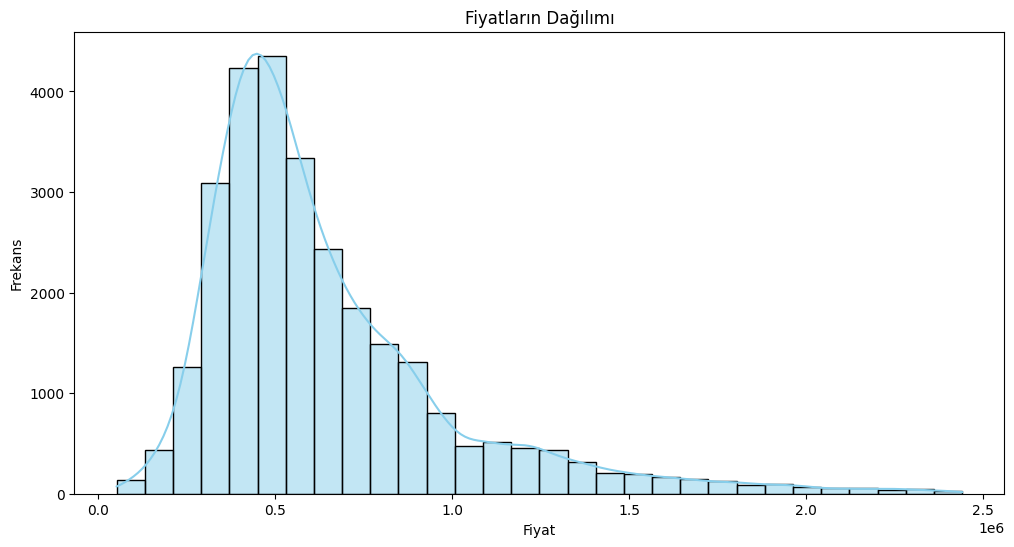

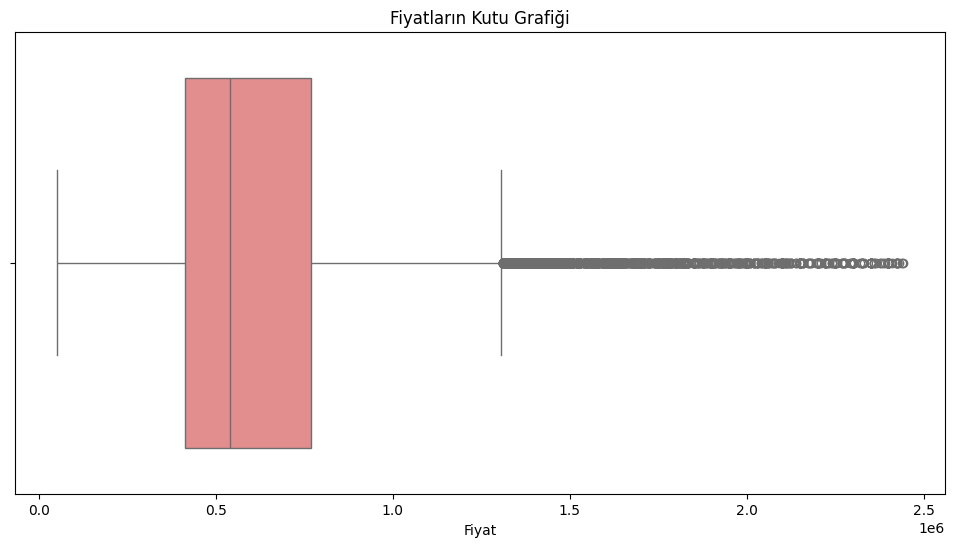

In [50]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Fiyat'], bins=30, kde=True, color='skyblue')
plt.title('Fiyatların Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

# Kutu Grafiği
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Fiyat'], color='lightcoral')
plt.title('Fiyatların Kutu Grafiği')
plt.xlabel('Fiyat')
plt.show()


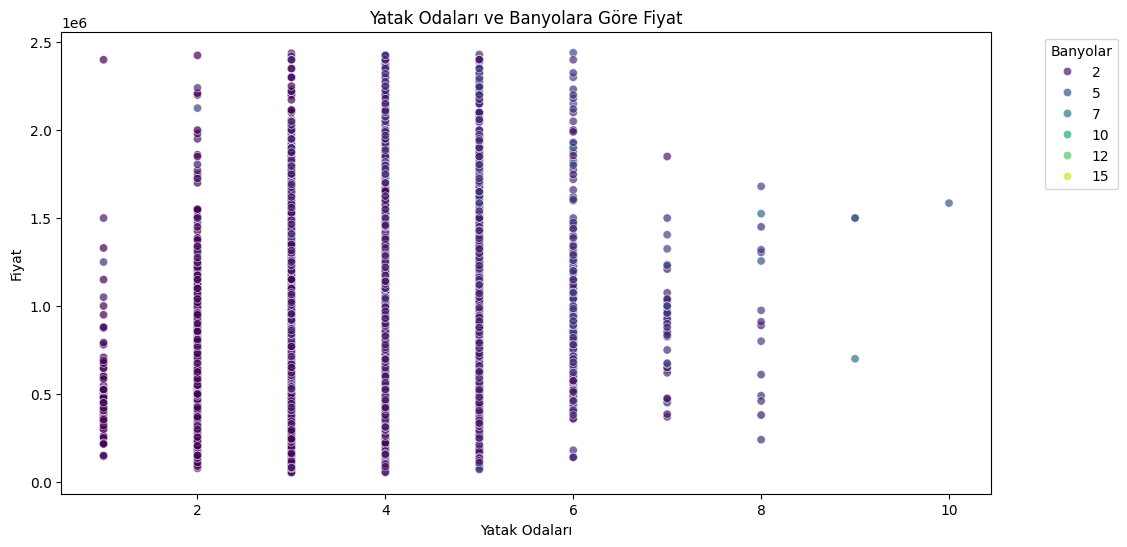

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Yatak_Odaları', y='Fiyat', data=df, hue='Banyolar', palette='viridis', alpha=0.7)
plt.title('Yatak Odaları ve Banyolara Göre Fiyat')
plt.xlabel('Yatak Odaları')
plt.ylabel('Fiyat')
plt.legend(title='Banyolar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

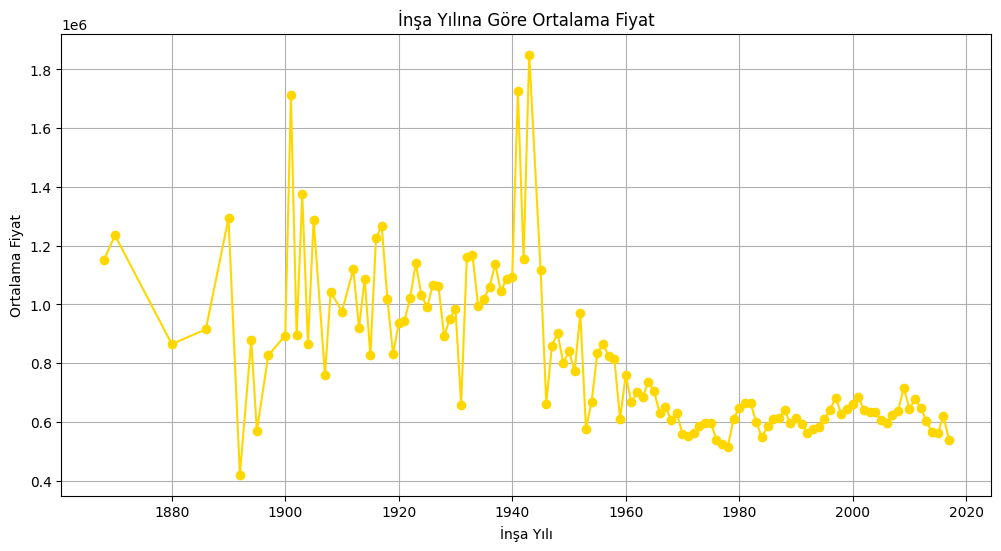

In [52]:
# Ortalama fiyatları hesapla
avg_yıl = df.groupby('İnşa_Yılı')['Fiyat'].mean().sort_index()

# Çizgi Grafiği
plt.figure(figsize=(12, 6))
avg_yıl.plot(kind='line', marker='o', color='gold')
plt.title('İnşa Yılına Göre Ortalama Fiyat')
plt.xlabel('İnşa Yılı')
plt.ylabel('Ortalama Fiyat')
plt.grid(True)
plt.show()


In [53]:
top_semtler = df['Semt'].value_counts().nlargest(30).index
top_semtler

Index(['Bertram', 'Henley Brook', 'Jane Brook', 'Merriwa', 'Mindarie', 'Iluka',
       'Darch', 'Huntingdale', 'Butler', 'Maida Vale', 'Gwelup',
       'Secret Harbour', 'Hocking', 'Hillman', 'Tapping', 'Ashby',
       'Bennett Springs', 'Wattle Grove', 'Jandakot', 'Carramar', 'Clarkson',
       'Helena Valley', 'Atwell', 'Madeley', 'Menora', 'Sinagra', 'Currambine',
       'High Wycombe', 'Banksia Grove', 'Port Kennedy'],
      dtype='object', name='Semt')

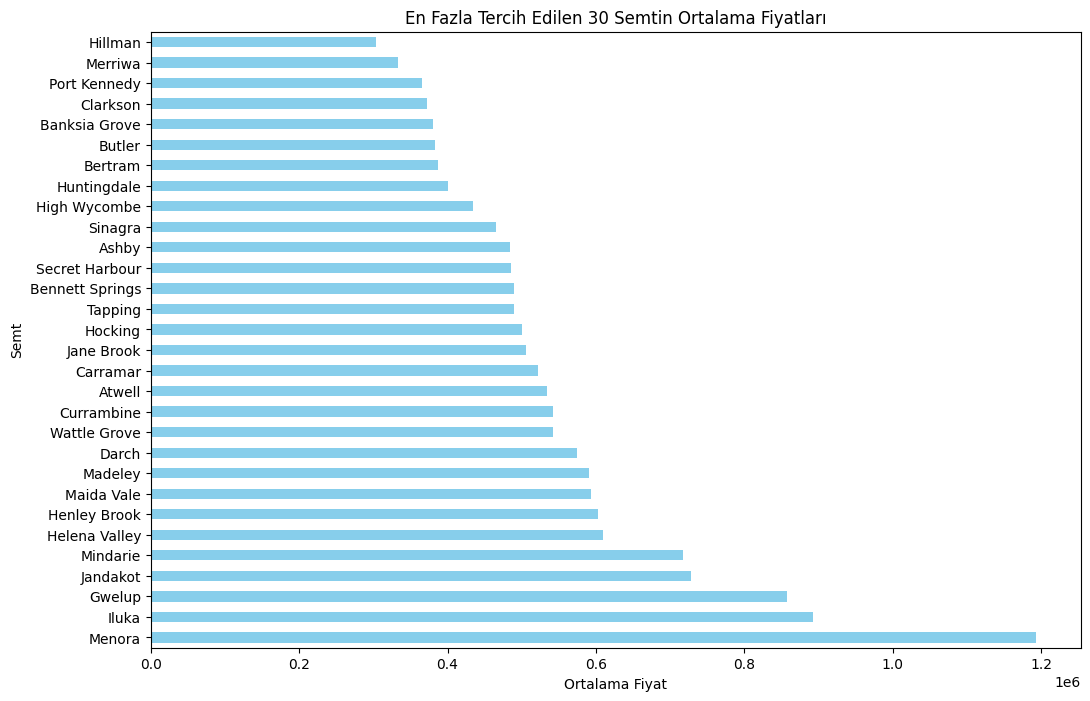

In [54]:
filtered_df = df[df['Semt'].isin(top_semtler)]
avg_prices = filtered_df.groupby('Semt')['Fiyat'].mean().loc[top_semtler].sort_values()

# Bar Grafiği
plt.figure(figsize=(12, 8))
avg_prices.plot(kind='barh', color='skyblue')
plt.title('En Fazla Tercih Edilen 30 Semtin Ortalama Fiyatları')
plt.xlabel('Ortalama Fiyat')
plt.ylabel('Semt')
plt.gca().invert_yaxis() 
plt.show()


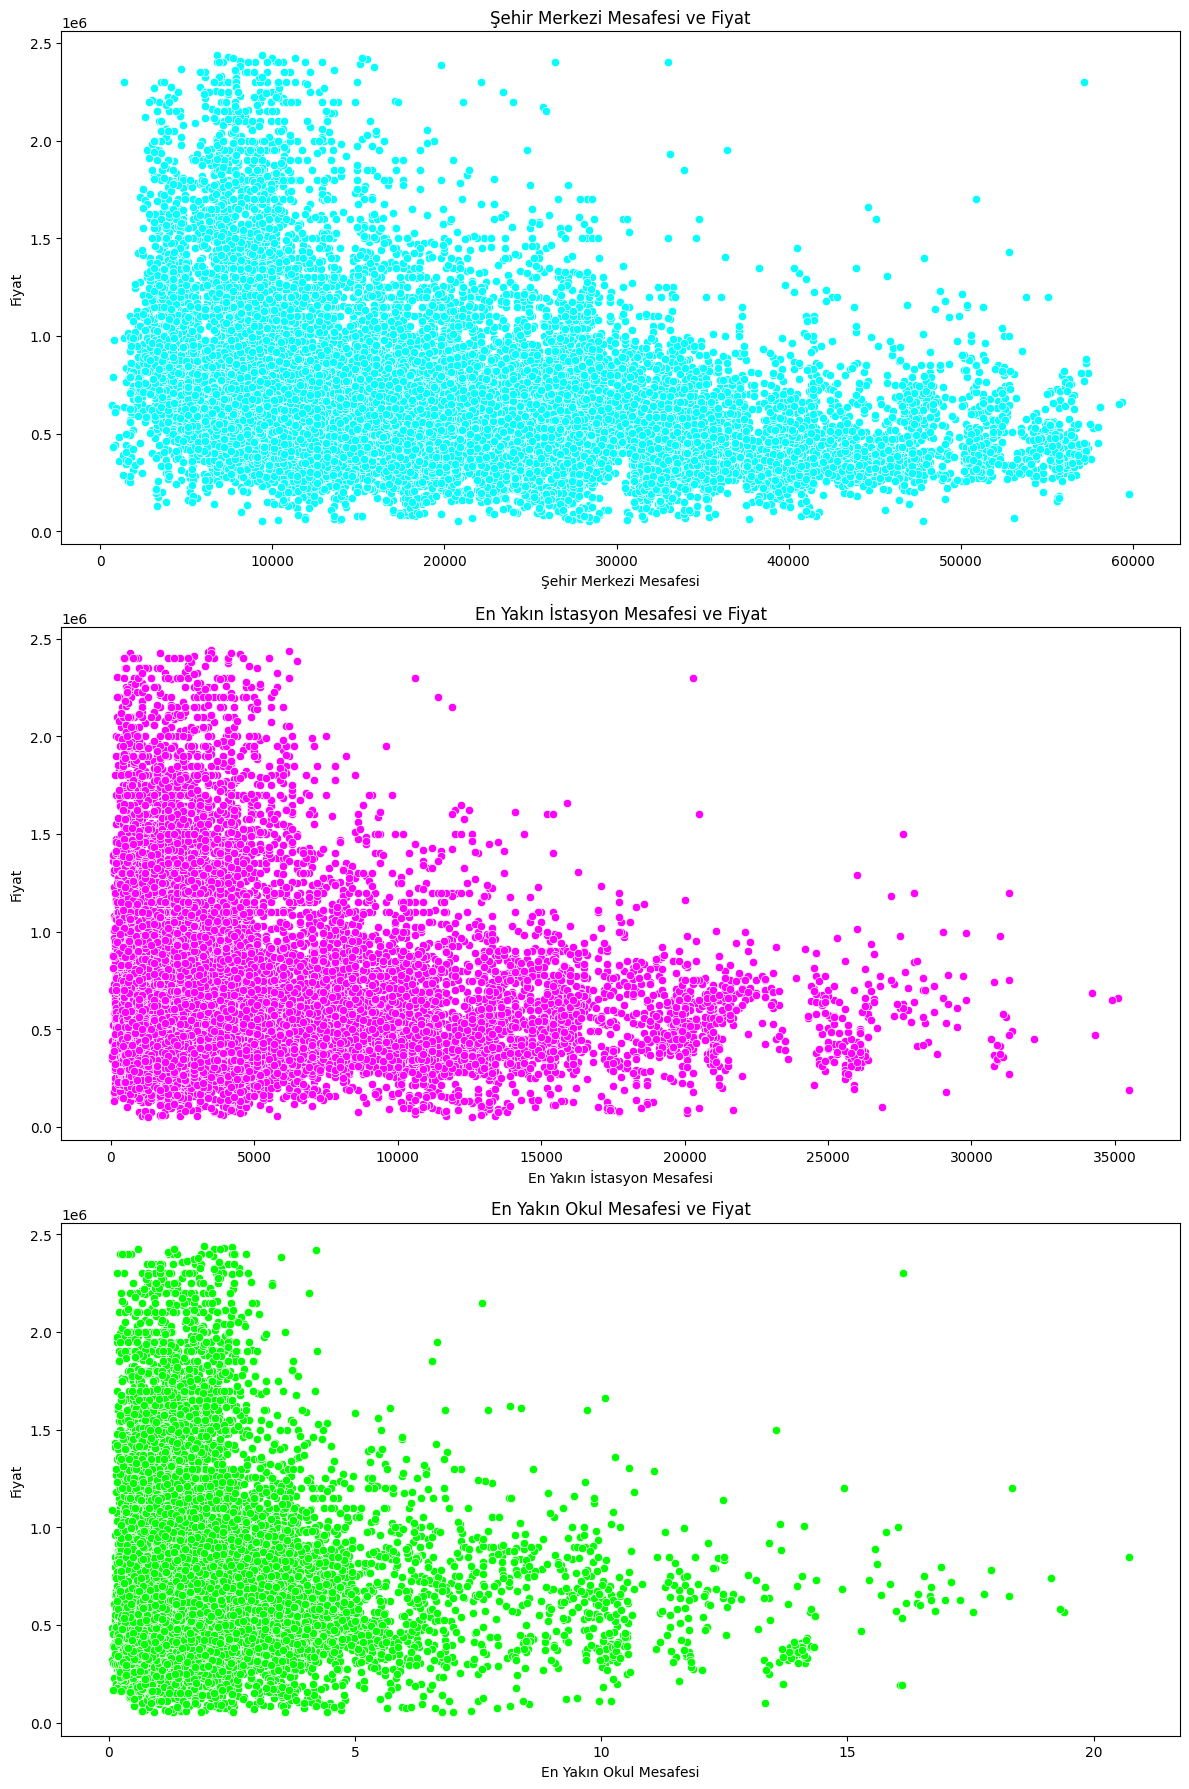

In [55]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Şehir Merkezi Mesafesi
sns.scatterplot(x='Şehir_Merkezi_Mesafesi', y='Fiyat', data=df, ax=axs[0], color='cyan')
axs[0].set_title('Şehir Merkezi Mesafesi ve Fiyat')
axs[0].set_xlabel('Şehir Merkezi Mesafesi')
axs[0].set_ylabel('Fiyat')

# En Yakın İstasyon Mesafesi
sns.scatterplot(x='En_Yakın_İstasyon_Mesafesi', y='Fiyat', data=df, ax=axs[1], color='magenta')
axs[1].set_title('En Yakın İstasyon Mesafesi ve Fiyat')
axs[1].set_xlabel('En Yakın İstasyon Mesafesi')
axs[1].set_ylabel('Fiyat')

# En Yakın Okul Mesafesi
sns.scatterplot(x='En_Yakın_Okul_Mesafesi', y='Fiyat', data=df, ax=axs[2], color='lime')
axs[2].set_title('En Yakın Okul Mesafesi ve Fiyat')
axs[2].set_xlabel('En Yakın Okul Mesafesi')
axs[2].set_ylabel('Fiyat')

plt.tight_layout()
plt.show()



C:\Users\METEHAN\AppData\Local\Temp\ipykernel_5200\2543727033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Garaj', y='Fiyat', data=df, palette='pastel')


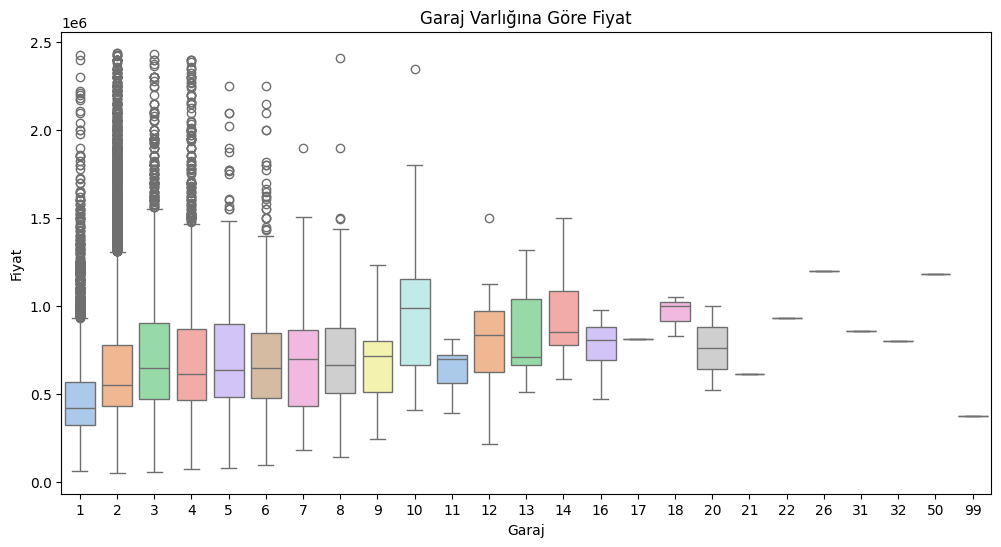

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Garaj', y='Fiyat', data=df, palette='pastel')
plt.title('Garaj Varlığına Göre Fiyat')
plt.xlabel('Garaj')
plt.ylabel('Fiyat')
plt.show()


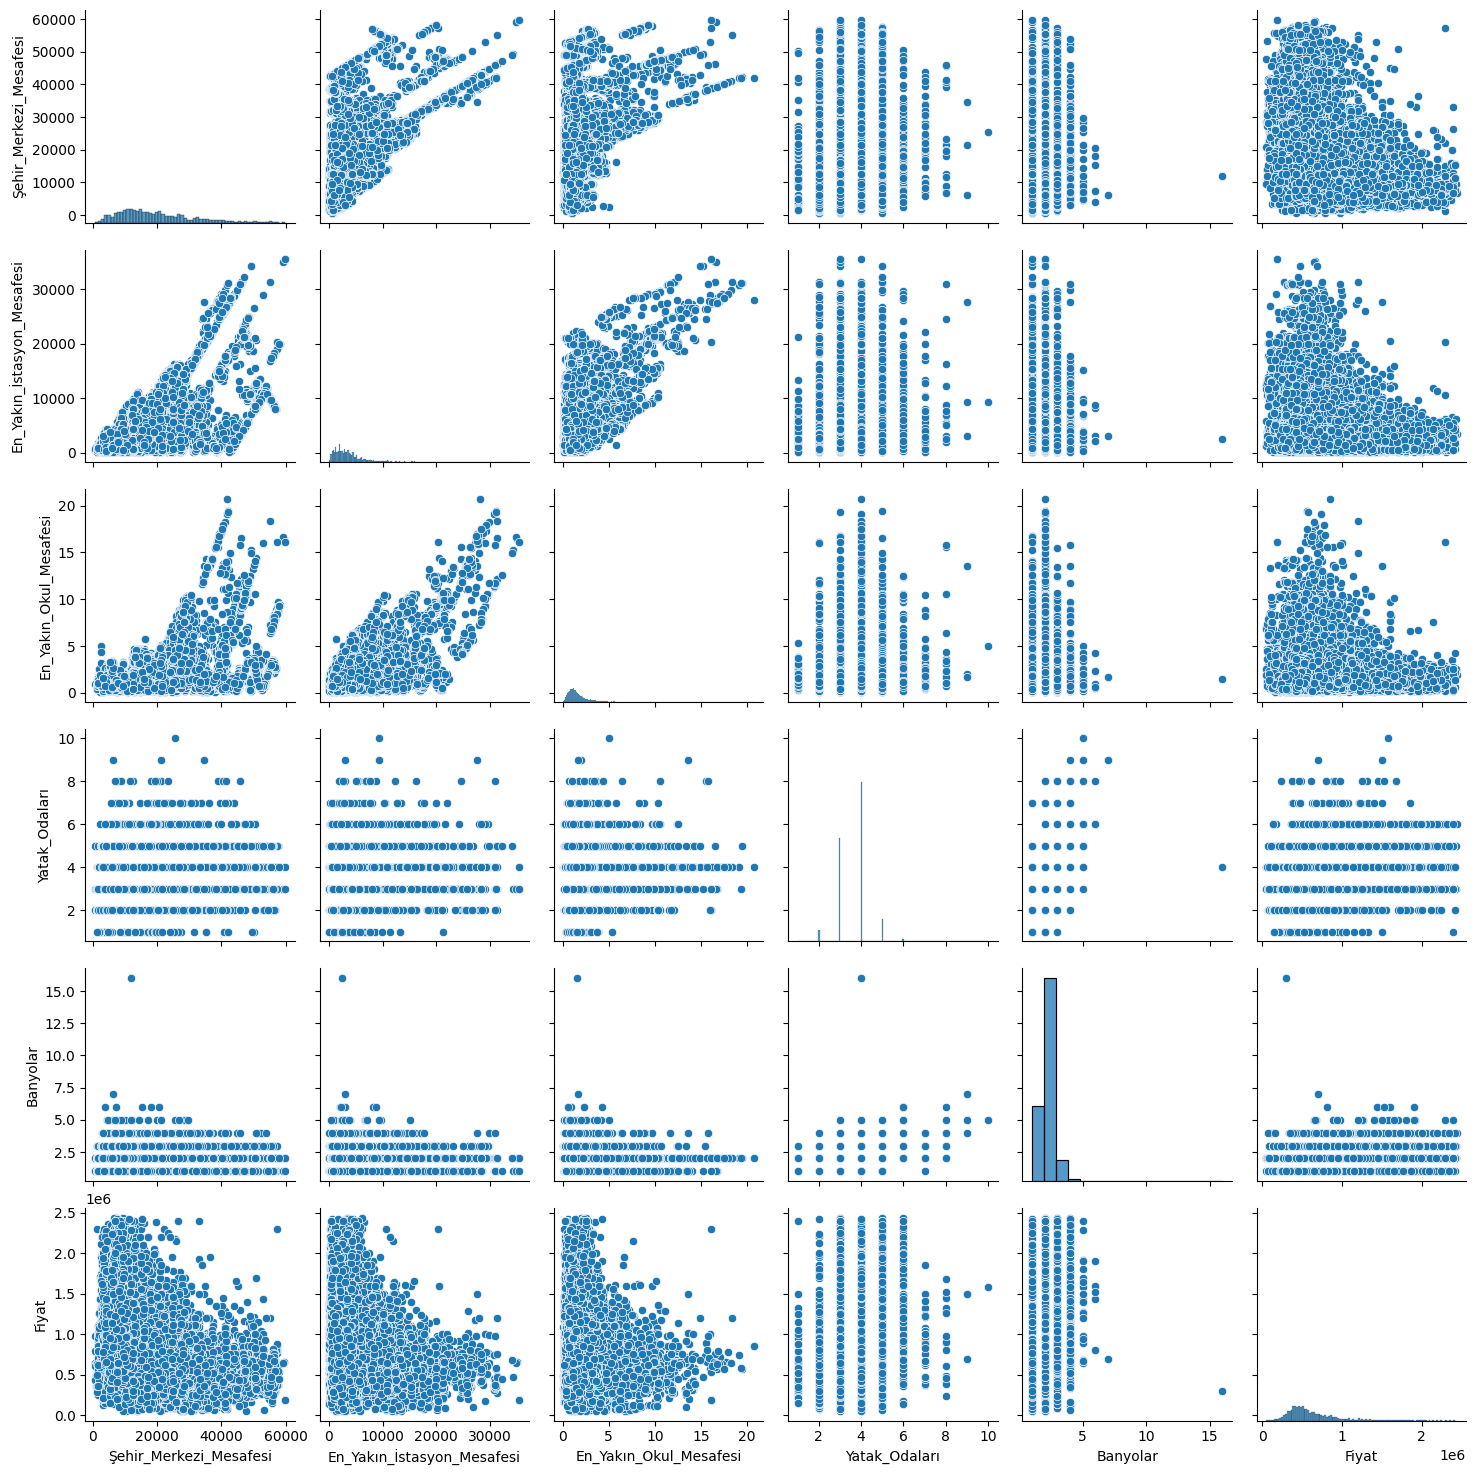

In [57]:
sns.pairplot(df[['Şehir_Merkezi_Mesafesi', 'En_Yakın_İstasyon_Mesafesi', 'En_Yakın_Okul_Mesafesi', 'Yatak_Odaları', 'Banyolar', 'Fiyat']])
plt.show()


## Outlier Hesaplama

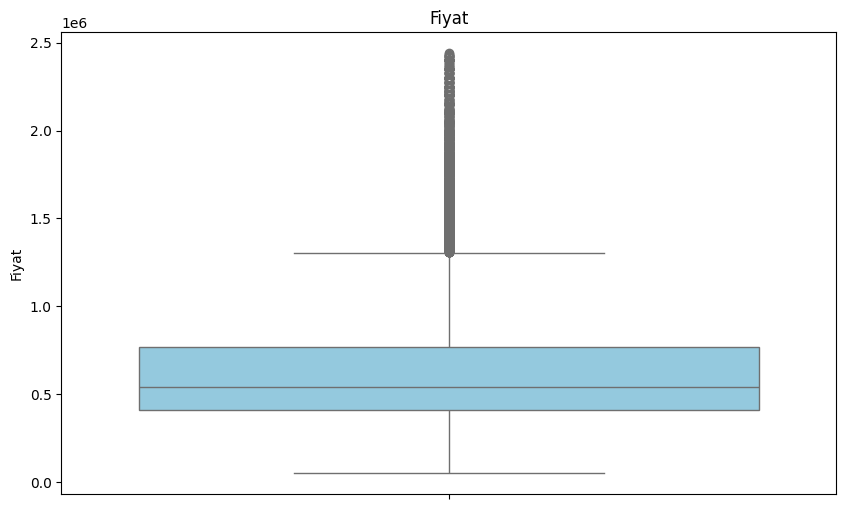

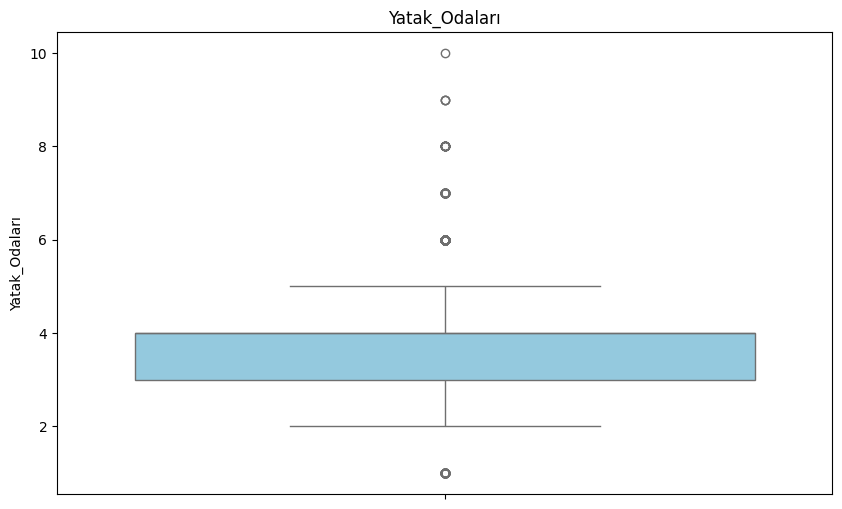

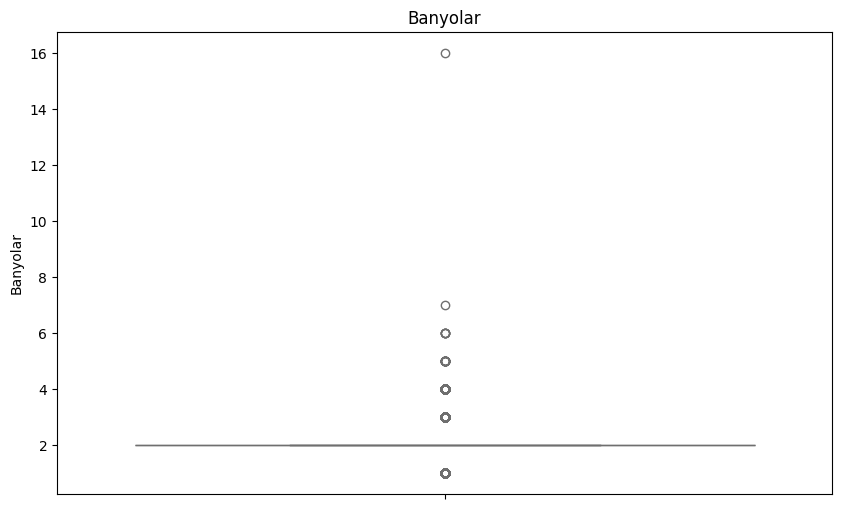

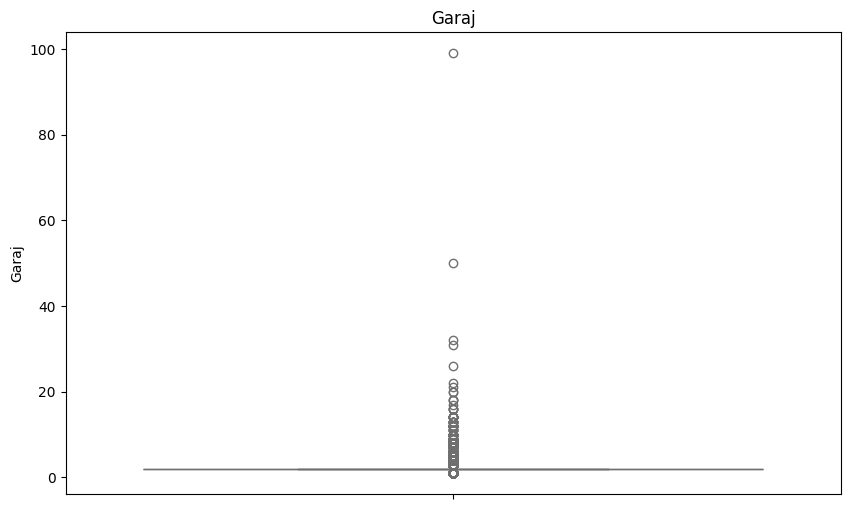

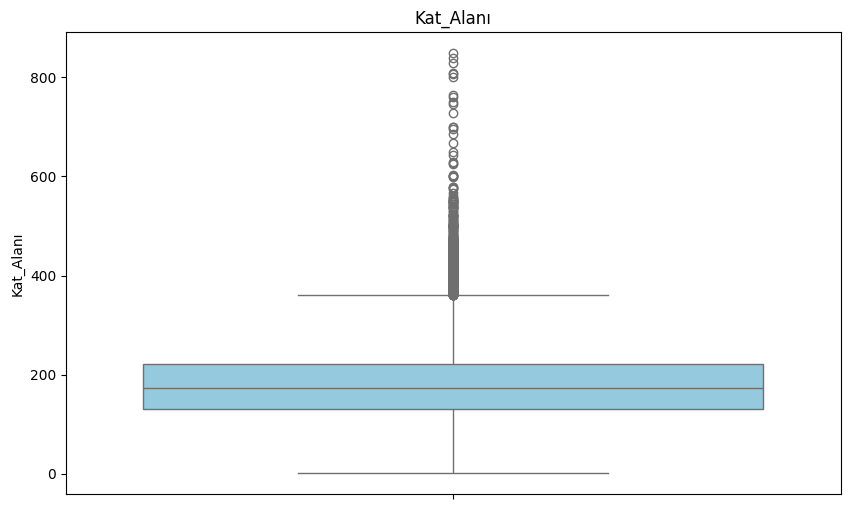

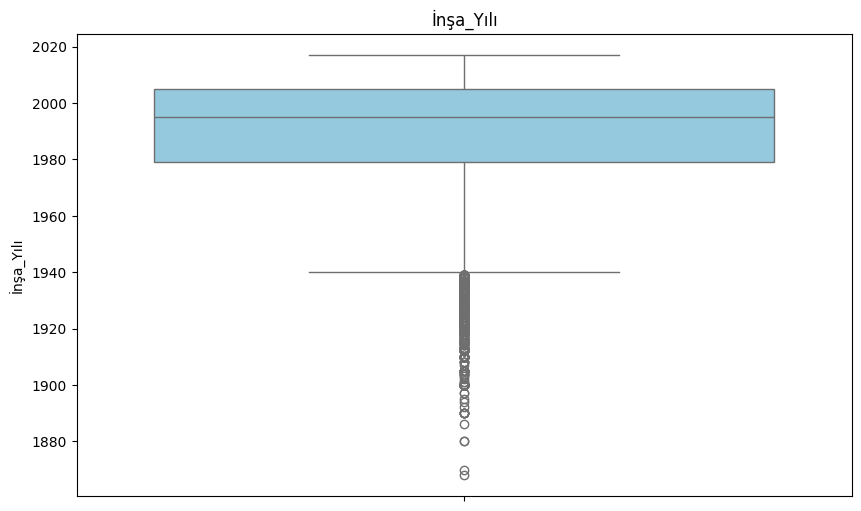

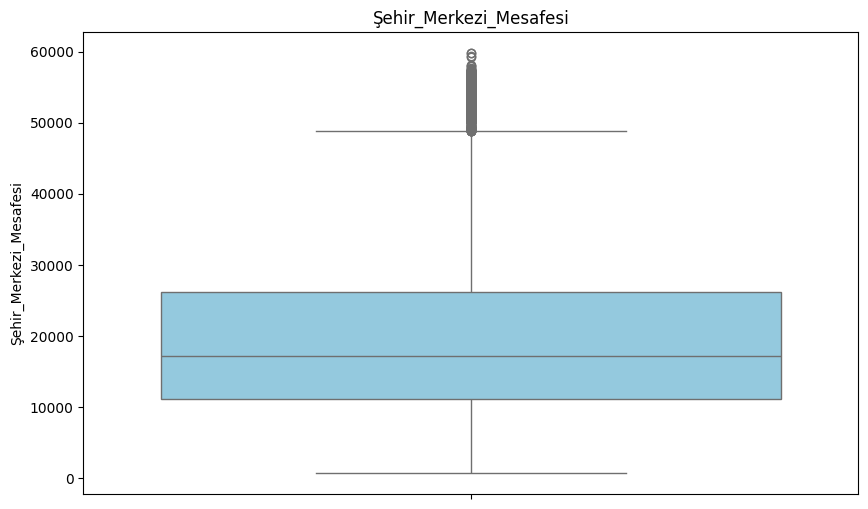

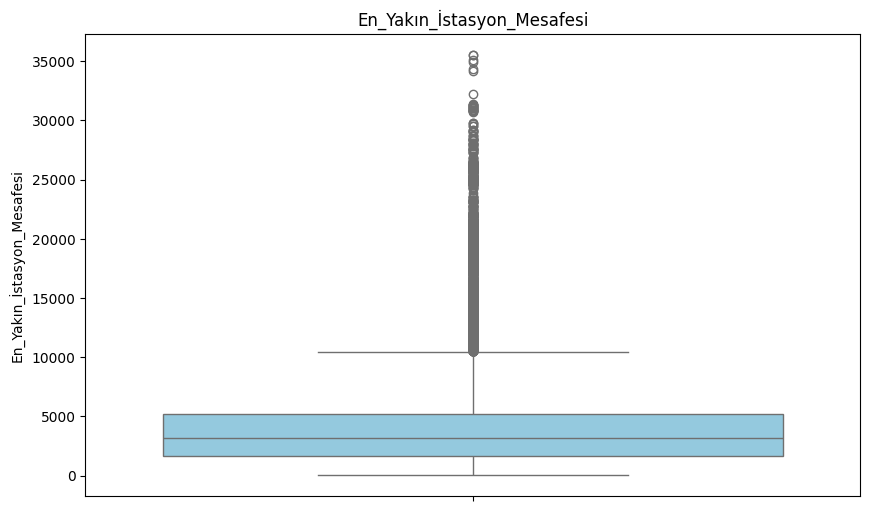

In [58]:
# Aykırı değerlerin belirleneceği sütunları seçtik
columns_outlier = ['Fiyat', 'Yatak_Odaları', 'Banyolar', 'Garaj', 'Kat_Alanı', 'İnşa_Yılı', 'Şehir_Merkezi_Mesafesi', 'En_Yakın_İstasyon_Mesafesi']

# Box plot ile aykırı değerlerin görselleştirilmesi 
for column in columns_outlier:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[column] , color = "skyblue")
    plt.title(f'{column}')
    plt.show()

In [59]:
for i in columns_outlier:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Aykırı değerleri belirleyip veri setinden çıkarma
    df = df[(df[i] >= (Q1 - 1.5 * IQR)) & (df[i] <= (Q3 + 1.5 * IQR))]

df.head()

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,1 Acorn Place,South Lake,565000,4,2,2,160,2003,18300,1800,0.828339
1,1 Addis Way,Wandi,365000,3,2,2,139,2013,26900,4900,5.524324
4,1 Aman Place,Lockridge,325000,4,1,2,131,1998,11200,2000,1.514922
6,1 Ardara Lane,Hilbert,400000,3,2,2,132,2014,28200,3700,2.485731
7,1 Arnside Bend,Waikiki,370000,4,2,2,158,2013,41700,1100,0.491573


In [60]:
df.shape

(14458, 11)

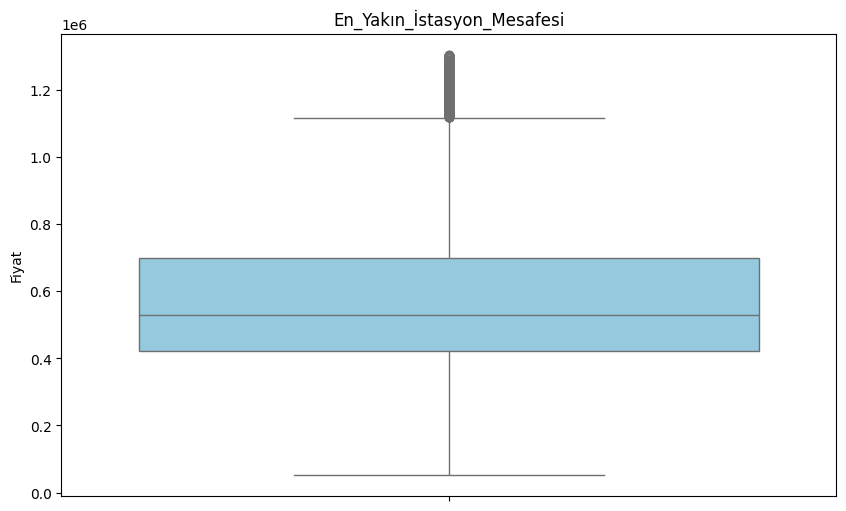

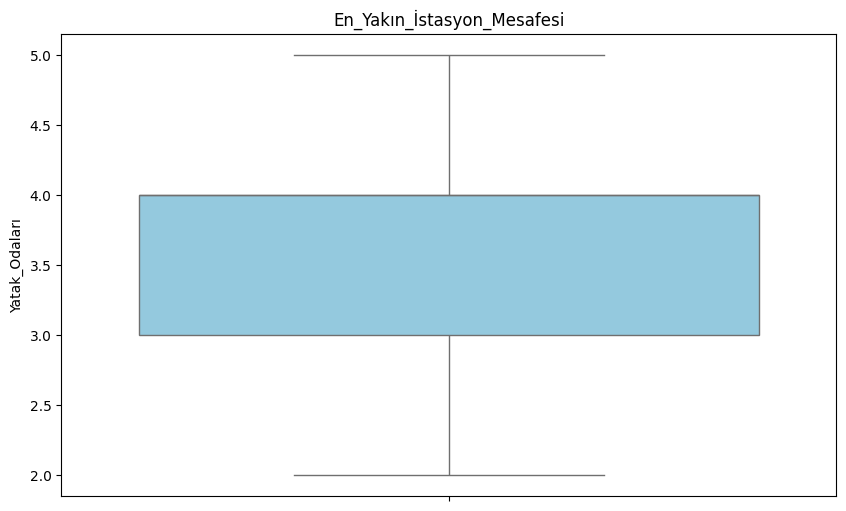

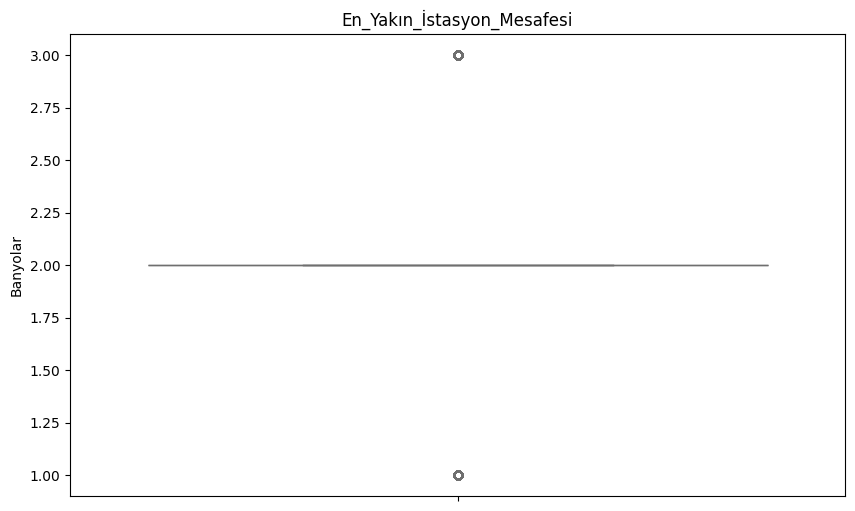

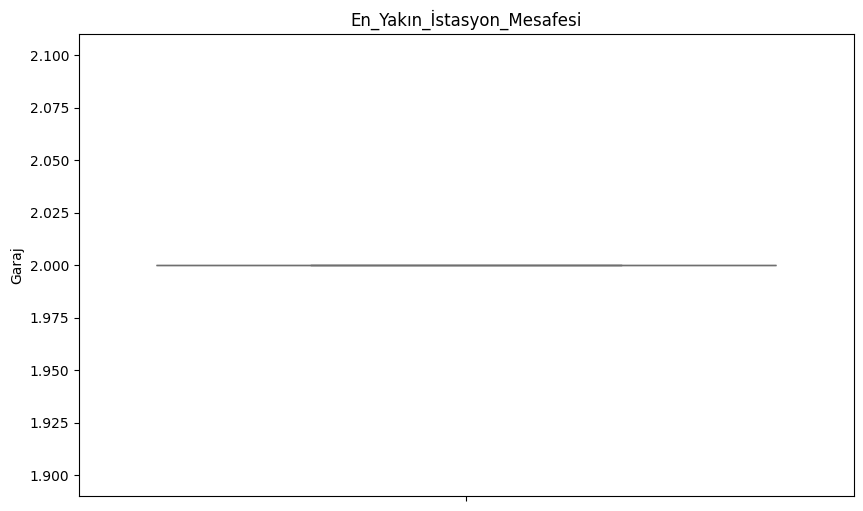

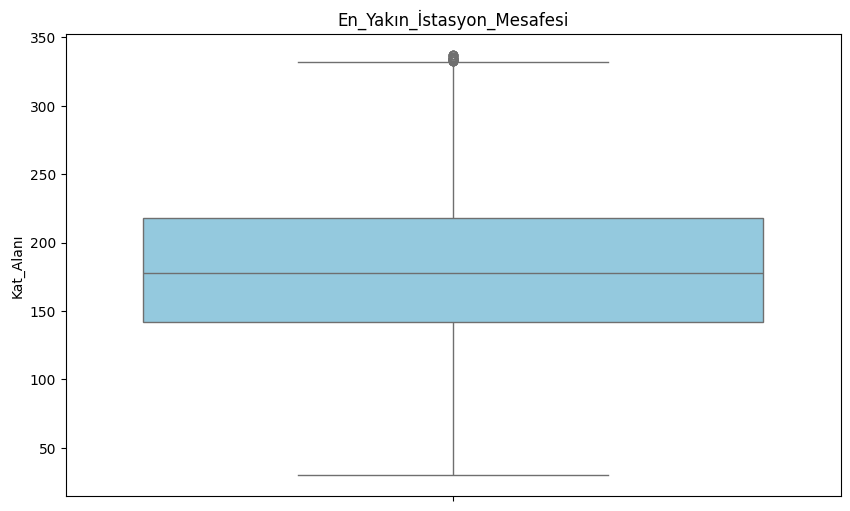

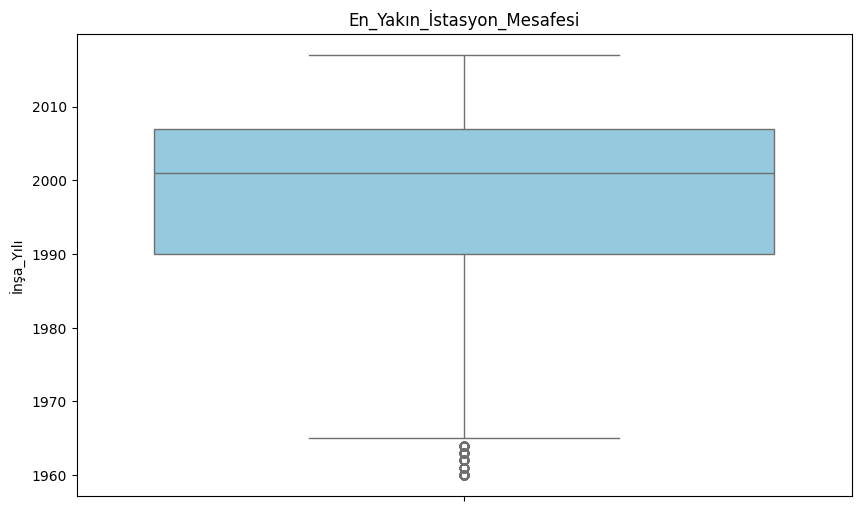

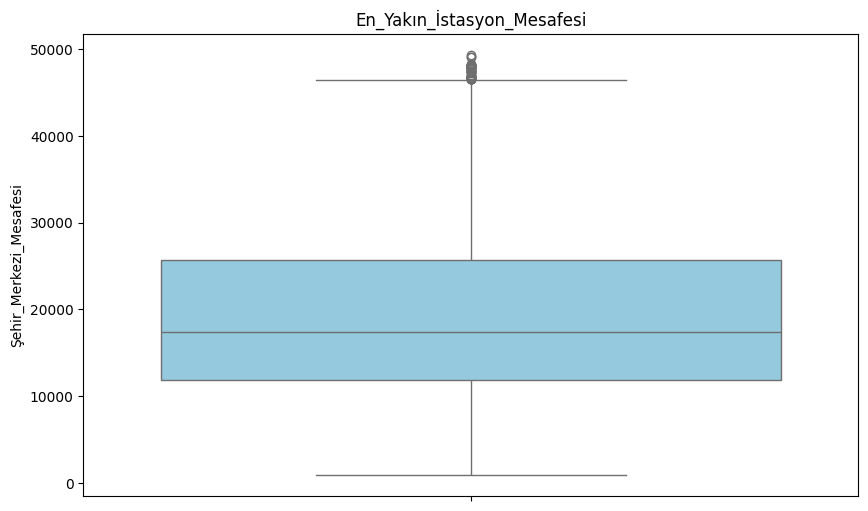

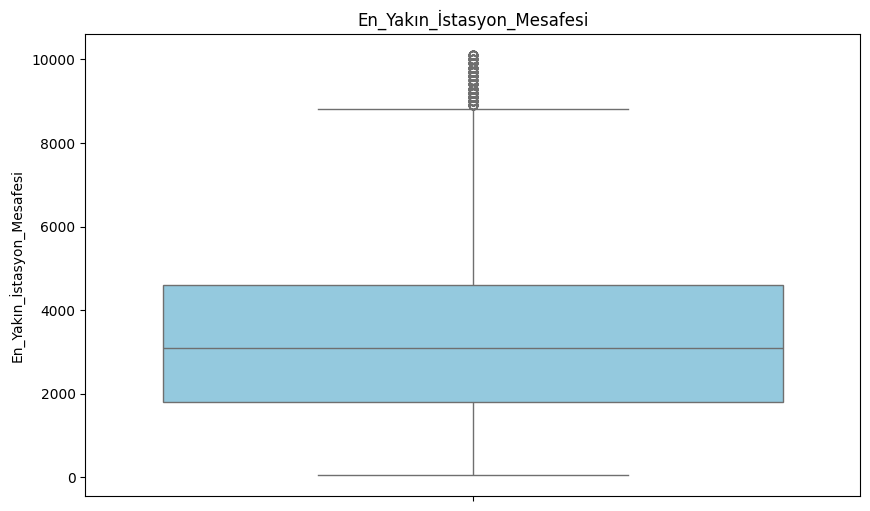

In [61]:
## Outlier değerleri kaldırdık ve görselleştirme yaptık

for i in columns_outlier:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[i] , color = "skyblue")
    plt.title(f'{column}')
    plt.show()

In [62]:
df.head()

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,1 Acorn Place,South Lake,565000,4,2,2,160,2003,18300,1800,0.828339
1,1 Addis Way,Wandi,365000,3,2,2,139,2013,26900,4900,5.524324
4,1 Aman Place,Lockridge,325000,4,1,2,131,1998,11200,2000,1.514922
6,1 Ardara Lane,Hilbert,400000,3,2,2,132,2014,28200,3700,2.485731
7,1 Arnside Bend,Waikiki,370000,4,2,2,158,2013,41700,1100,0.491573


## ML Model Time

In [63]:
# Encode Time

le = LabelEncoder()
kategoric_column = df[["Adres" , "Semt"]]

label_encoders = {}
for i in kategoric_column:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    label_encoders[i] = le

df.head(40)

,Adres,Semt,Fiyat,Yatak_Odaları,Banyolar,Garaj,Kat_Alanı,İnşa_Yılı,Şehir_Merkezi_Mesafesi,En_Yakın_İstasyon_Mesafesi,En_Yakın_Okul_Mesafesi
0,0,242,565000,4,2,2,160,2003,18300,1800,0.828339
1,1,262,365000,3,2,2,139,2013,26900,4900,5.524324
4,2,162,325000,4,1,2,131,1998,11200,2000,1.514922
6,3,119,400000,3,2,2,132,2014,28200,3700,2.485731
7,4,260,370000,4,2,2,158,2013,41700,1100,0.491573
11,5,44,367500,3,2,2,158,2003,36300,2100,0.680843
12,6,15,300000,3,2,2,94,2008,11500,4800,0.189350
14,7,268,540000,4,2,2,186,2004,13100,5100,3.234399
17,8,166,570000,4,2,2,225,2003,15300,7000,2.746772
21,9,11,465000,4,2,2,173,2000,20700,1600,0.747108


In [64]:
## Train Test

x = df.drop("Fiyat" , axis=1)
y = df["Fiyat"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Time 

In [65]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(x_train, y_train)
model.score(x_test, y_test)

0.6813396083597207

In [66]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(x_train, y_train)
model.score(x_test, y_test)

0.730421781539917

In [67]:
import pickle

# model değişkeniniz burada
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
